In [1]:
import os
import re
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize


In [2]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
folder_path = "/content/Harry Potter"

In [5]:
combined_text_list = []

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):  # Check if the file is a .txt file
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r", encoding="utf-8") as file:
            combined_text_list.append(file.read())  # Add the content of each file as a list element




In [6]:
combined_text_list

['The hottest day of the summer so far was drawing to a close and a drowsy silence lay over the large, square houses of Privet Drive. Cars that were usually gleaming stood dusty in their drives and lawns that were once emerald green lay parched and yellowing -for the use of hosepipes had been banned due to drought. Deprived of their usual car-washing and lawn-mowing pursuits, the inhabitants of Privet Drive had retreated into the shade of their cool houses, windows thrown wide in the hope of tempting in a nonexistent breeze. The only person left outdoors was a teenage boy who was lying flat on his back in a flowerbed outside number four.\n\nHe was a skinny, black-haired, bespectacled boy who had the pinched, slightly unhealthy look of someone who has grown a lot in a short space of time. His jeans were torn and dirty, his T-shirt baggy and faded, and the soles of his trainers were peeling away from the uppers. Harry Potter\'s appearance did not endear him to the neighbors, who were the

In [7]:
len(combined_text_list)

7

In [8]:
corpus = []
for text in combined_text_list :  # Iterate over the list of large texts
    sentences = sent_tokenize(text)  # Split the text into sentences
    for sentence in sentences:  # Process each sentence
        sentence = sentence.lower()  # Convert to lowercase
        sentence = re.sub(r'[^a-zA-Z\s]', '', sentence)  # Remove non-alphabetic characters
        words = sentence.split()  # Split into words
        processed_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatize and remove stopwords
        corpus.append(' '.join(processed_words))  # Add processed sentence to the corpus


In [9]:
corpus

['hottest day summer far drawing close drowsy silence lay large square house privet drive',
 'car usually gleaming stood dusty drive lawn emerald green lay parched yellowing use hosepipe banned due drought',
 'deprived usual carwashing lawnmowing pursuit inhabitant privet drive retreated shade cool house window thrown wide hope tempting nonexistent breeze',
 'person left outdoors teenage boy lying flat back flowerbed outside number four',
 'skinny blackhaired bespectacled boy pinched slightly unhealthy look someone grown lot short space time',
 'jean torn dirty tshirt baggy faded sol trainer peeling away upper',
 'harry potter appearance endear neighbor sort people thought scruffiness ought punishable law hidden behind large hydrangea bush evening quite invisible passersby',
 'fact way would spotted uncle vernon aunt petunia stuck head livingroom window looked straight flowerbed',
 'whole harry thought congratulated idea hiding',
 'perhaps comfortable lying hot hard earth hand nobody g

In [10]:
type(corpus)

list

In [11]:
from gensim.utils import simple_preprocess

In [12]:
words=[]
for sent in corpus:
    sent_token=sent_tokenize(sent)
    for sent in sent_token:
        words.append(simple_preprocess(sent))

In [13]:
words

[['hottest',
  'day',
  'summer',
  'far',
  'drawing',
  'close',
  'drowsy',
  'silence',
  'lay',
  'large',
  'square',
  'house',
  'privet',
  'drive'],
 ['car',
  'usually',
  'gleaming',
  'stood',
  'dusty',
  'drive',
  'lawn',
  'emerald',
  'green',
  'lay',
  'parched',
  'yellowing',
  'use',
  'hosepipe',
  'banned',
  'due',
  'drought'],
 ['deprived',
  'usual',
  'carwashing',
  'lawnmowing',
  'pursuit',
  'inhabitant',
  'privet',
  'drive',
  'retreated',
  'shade',
  'cool',
  'house',
  'window',
  'thrown',
  'wide',
  'hope',
  'tempting',
  'nonexistent',
  'breeze'],
 ['person',
  'left',
  'outdoors',
  'teenage',
  'boy',
  'lying',
  'flat',
  'back',
  'flowerbed',
  'outside',
  'number',
  'four'],
 ['skinny',
  'blackhaired',
  'bespectacled',
  'boy',
  'pinched',
  'slightly',
  'unhealthy',
  'look',
  'someone',
  'grown',
  'lot',
  'short',
  'space',
  'time'],
 ['jean',
  'torn',
  'dirty',
  'tshirt',
  'baggy',
  'faded',
  'sol',
  'trainer'

In [14]:
len(words)

63870

In [15]:
import gensim

In [16]:
# train w2v from scratch
model=gensim.models.Word2Vec(words)

In [17]:
w=model.wv.index_to_key

In [18]:
model.corpus_count

63870

In [19]:
model.wv.similar_by_word('harry')

[('hagrid', 0.6837745308876038),
 ('hermione', 0.6708709597587585),
 ('cho', 0.6479939818382263),
 ('ron', 0.6423956155776978),
 ('anxiously', 0.6046391725540161),
 ('quickly', 0.597749650478363),
 ('tentatively', 0.5954346656799316),
 ('lavender', 0.59233558177948),
 ('oho', 0.5912523865699768),
 ('nervously', 0.5812182426452637)]

In [20]:
model.wv['think']

array([-1.0381197 ,  0.18283483,  1.1762085 ,  0.75586563,  0.70329994,
       -0.1461556 ,  0.4991881 ,  0.6381086 , -0.71195096,  0.0272471 ,
        0.03656742, -0.98142636,  0.5089385 ,  0.10865527, -0.27820894,
       -0.47226006, -0.27295774, -0.086472  , -0.4833275 , -0.51362514,
       -0.099371  , -0.12699409,  0.54976887, -0.17330696,  0.39793992,
       -0.39731526, -1.2719079 ,  0.5498064 , -0.5603517 , -1.2091491 ,
        0.42542857, -0.5537642 ,  1.5875759 , -0.01876258, -0.25488067,
        0.35423458,  0.48814917, -0.6490218 ,  0.26522046, -0.12360157,
       -0.14543004, -0.7327188 ,  0.7308942 , -0.4500078 ,  0.3533511 ,
       -1.2806948 ,  0.06646145,  0.02746952, -0.63679045, -0.20521967,
        0.61385506, -0.32461002, -0.7593063 ,  0.49052414, -0.24663648,
        0.32276052,  1.3607557 ,  0.79671985,  0.6155443 , -0.13151361,
       -0.39986607,  0.58612263,  1.0806907 ,  0.60158634, -1.0674486 ,
        0.33046657,  0.9511855 ,  0.87619   , -1.3000098 ,  1.43

In [21]:
model.wv['think'].shape

(100,)

In [22]:
words[0]

['hottest',
 'day',
 'summer',
 'far',
 'drawing',
 'close',
 'drowsy',
 'silence',
 'lay',
 'large',
 'square',
 'house',
 'privet',
 'drive']

In [23]:
def avg_word2vec(doc):
    valid_vectors = [model.wv[word] for word in doc if word in model.wv]
    if len(valid_vectors) == 0:
        return np.zeros(100)  # Handle case where no words are valid
    return np.mean(valid_vectors, axis=0)

In [24]:
!pip install tqdm
from tqdm import tqdm

In [25]:
import numpy as np

In [26]:
word = []
for sentence in tqdm(words):  # Loop through each tokenized sentence
    word.append(avg_word2vec(sentence))  # Append the 100-dimensional embedding

100%|██████████| 63870/63870 [00:04<00:00, 15178.16it/s]


In [27]:
word

[array([-0.12092045,  0.18254416,  0.10848396,  0.16465774, -0.03083755,
        -0.79710376, -0.0988738 ,  0.11049431, -0.06140852, -0.2647876 ,
        -0.25061166, -0.5907062 , -0.03776581,  0.09320765,  0.05353455,
        -0.329874  , -0.25932506, -0.2631158 ,  0.20929171, -0.30711955,
        -0.02008875,  0.24535131, -0.12331678, -0.07084118, -0.19337767,
        -0.06475213,  0.03274609, -0.55407816, -0.09370141, -0.1628835 ,
         0.22855464,  0.44975322, -0.00101796,  0.06870729, -0.10117475,
         0.16336775, -0.13151048, -0.3634083 , -0.23786196, -0.86658275,
        -0.05759075, -0.10722124, -0.06834061,  0.01144245,  0.00899642,
        -0.2436692 , -0.62893605,  0.15644418,  0.18224294,  0.15658544,
        -0.10653397, -0.06805523,  0.04974095, -0.2162036 , -0.01159696,
         0.08823119,  0.08163404,  0.09289522, -0.10657445, -0.08225951,
         0.31153357,  0.26368934, -0.36099765,  0.02397161, -0.2623307 ,
         0.35828054, -0.55519474,  0.06568421, -0.3

In [28]:
len(word)

63870

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [30]:
# Assuming `averaged_vectors` is a list of 100-dimensional word vectors
import numpy as np

# Convert the list to a numpy array (if it isn't already)
word= np.array(word)


In [31]:
# Perform PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
word_pca1 = pca.fit_transform(word)


In [32]:
word_pca1

array([[-1.33786552,  1.17325588],
       [-1.64032314,  0.68796931],
       [-1.30675681,  0.70466431],
       ...,
       [ 0.22092201, -1.53027029],
       [ 2.94349651,  1.62763097],
       [ 1.82536138,  0.4739744 ]])

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(word_pca1[:, 0], word_pca1[:, 1], c=np.random.rand(len(word_pca1)), cmap='viridis', s=100, alpha=0.7, edgecolors='w')
plt.title("PCA of Word2Vec Vectors", fontsize=18, fontweight='bold')
plt.xlabel("PCA Component 1", fontsize=14)
plt.ylabel("PCA Component 2", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)
plt.colorbar(label="Cluster/Category")
plt.tight_layout()
plt.show()


In [33]:
from sklearn.metrics.pairwise import cosine_similarity

word_1 = 'harry'
word_2 = 'potter'
vector_1 = model.wv[word_1]
vector_2 = model.wv[word_2]
similarity_w2v = cosine_similarity([vector_1], [vector_2])[0][0]
#word2vec+pca
word_pca_dict = {w[i]: word_pca1[i] for i in range(len(w))}
vector_1_pca = word_pca_dict[word_1]
vector_2_pca = word_pca_dict[word_2]
similarity_w2v_pca = cosine_similarity([vector_1_pca], [vector_2_pca])[0][0]

print(similarity_w2v,similarity_w2v_pca)

-0.07607622 0.11305047575775723


In [37]:
# Perform PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
word_pca2 = pca.fit_transform(word)


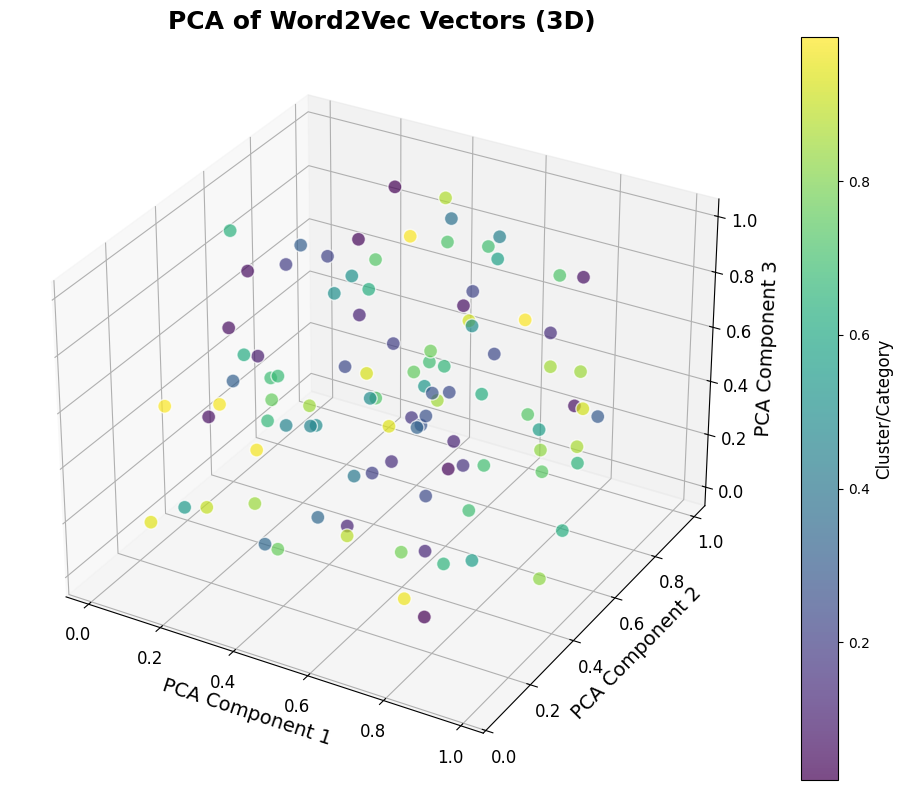

In [38]:
#from mpl_toolkits.mplot3d import Axes3D


word_pca2 = np.random.rand(100, 3)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(word_pca2[:, 0], word_pca2[:, 1], word_pca2[:, 2], c=np.random.rand(len(word_pca2)), cmap='viridis', s=100, alpha=0.7, edgecolors='w')
ax.set_title("PCA of Word2Vec Vectors (3D)", fontsize=18, fontweight='bold')
ax.set_xlabel("PCA Component 1", fontsize=14)
ax.set_ylabel("PCA Component 2", fontsize=14)
ax.set_zlabel("PCA Component 3", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, alpha=0.3)

cbar = plt.colorbar(ax.collections[0], ax=ax, orientation='vertical')
cbar.set_label("Cluster/Category", fontsize=12)

plt.tight_layout()
plt.show()


In [39]:
# Check explained variance for each principal component
print(pca.explained_variance_ratio_)
print(f"Total Explained Variance: {np.sum(pca.explained_variance_ratio_)}")


[0.33310003 0.16539663 0.07362007]
Total Explained Variance: 0.5721167256918616
